In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.animation import FuncAnimation
import os
from path import Path
import pickle
from prettytable import PrettyTable
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14) 

In [2]:
# First run the test.py to create the results pickle file for analysis
architectures = ['vit', 'cnn', 'vit-base', 'cnn-bam']
features = ['random']
save_dir = Path('results')

In [8]:
# Load the data file or files
t_rmse = PrettyTable()
t_dtw = PrettyTable()
t_rmse.field_names = ["Models"] + ["{}_shared".format(a) for a in features] + ["{}_test".format(a) for a in features]
results = {}
for arch in architectures:
    shared_rmse_v, shared_rmse_s = [], []
    test_rmse_v, test_rmse_s = [], []
    for f in features:
        file_v = save_dir/"{}_visu_{}.pkl".format(arch, f)
        with open(file_v, 'rb') as fileobject:
            results_v = pickle.load(fileobject)
        file_s = save_dir/"{}_state_{}.pkl".format(arch, f)
        with open(file_s, 'rb') as fileobject:
            results_s = pickle.load(fileobject)
        results["{}_visu_{}".format(arch, f)] = results_v
        results["{}_state_{}".format(arch, f)] = results_s
        shared_rmse_s.append(results_s['shared_rmse'].mean())
        shared_rmse_v.append(results_v['shared_rmse'].mean())
        test_rmse_s.append(results_s['test_rmse'].mean())
        test_rmse_v.append(results_v['test_rmse'].mean())

    t_rmse.add_row(["{}_visu".format(arch)] + [a for a in shared_rmse_v] + [a for a in test_rmse_v])
    t_rmse.add_row(["{}_state".format(arch)] + [a for a in shared_rmse_s] + [a for a in test_rmse_s])

print(t_rmse)

+----------------+---------------------+
|     Models     |        random       |
+----------------+---------------------+
|    vit_visu    | 0.09971499579492957 |
|   vit_state    | 0.08464543160051108 |
|    cnn_visu    | 0.11435237248738607 |
|   cnn_state    |  0.0931394961134841 |
| vit-base_visu  | 0.09587076222213606 |
| vit-base_state | 0.07772272186043362 |
|  cnn-bam_visu  | 0.09546044821850956 |
| cnn-bam_state  | 0.08995918186071018 |
+----------------+---------------------+


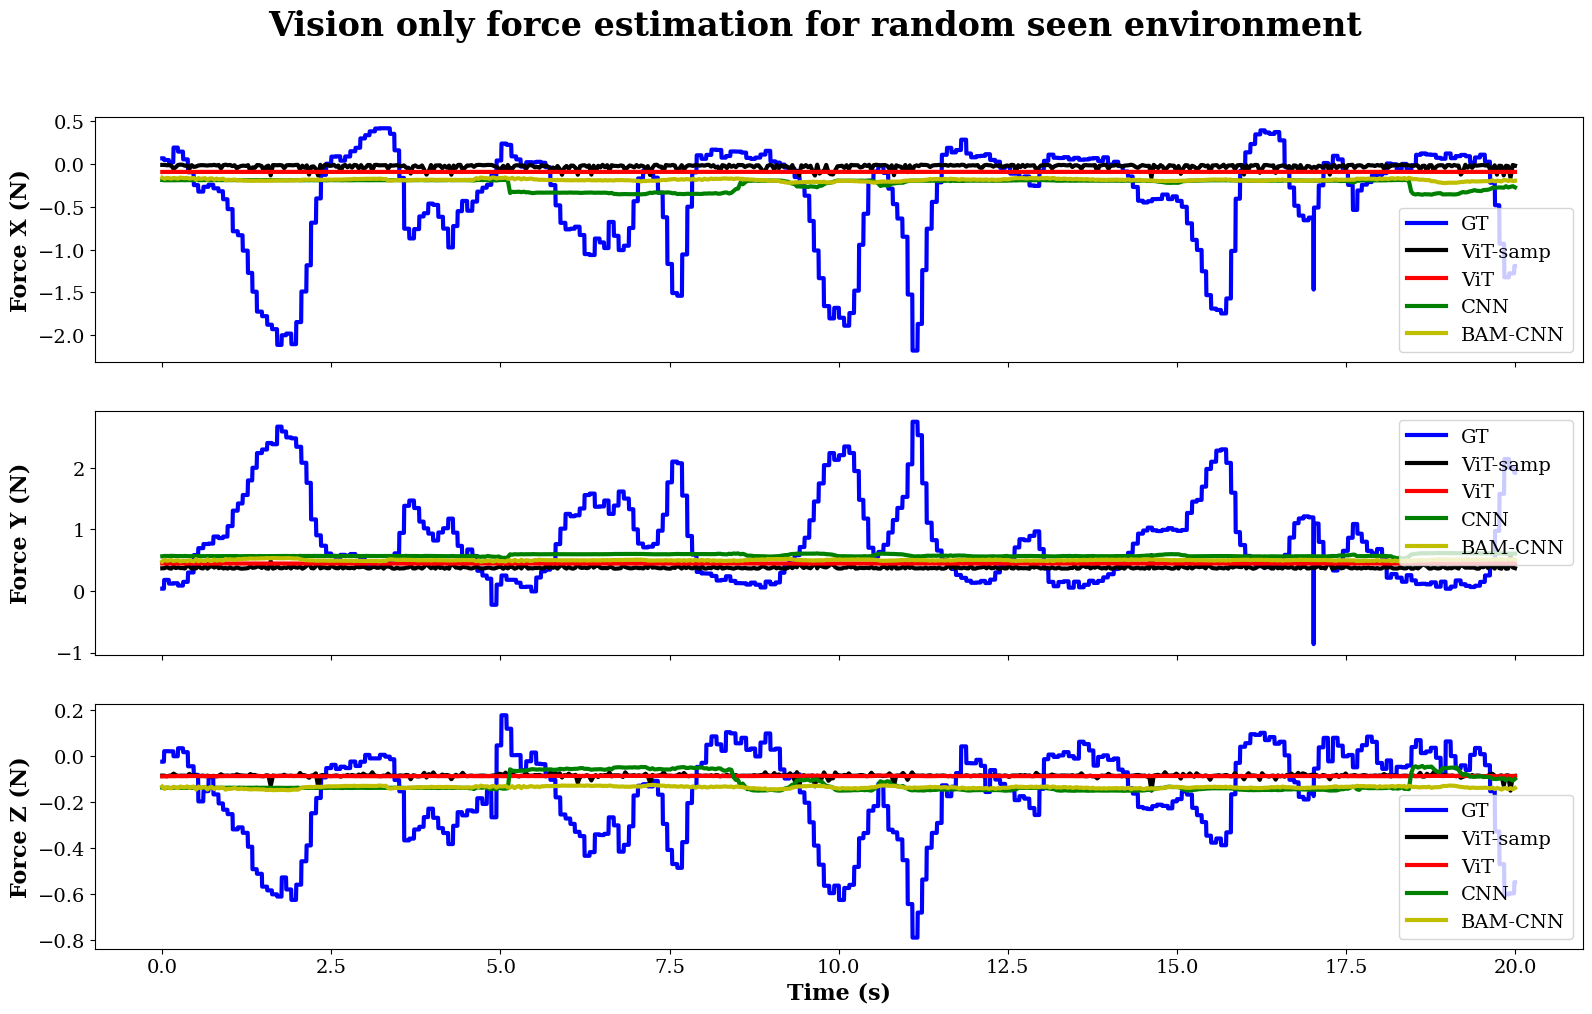

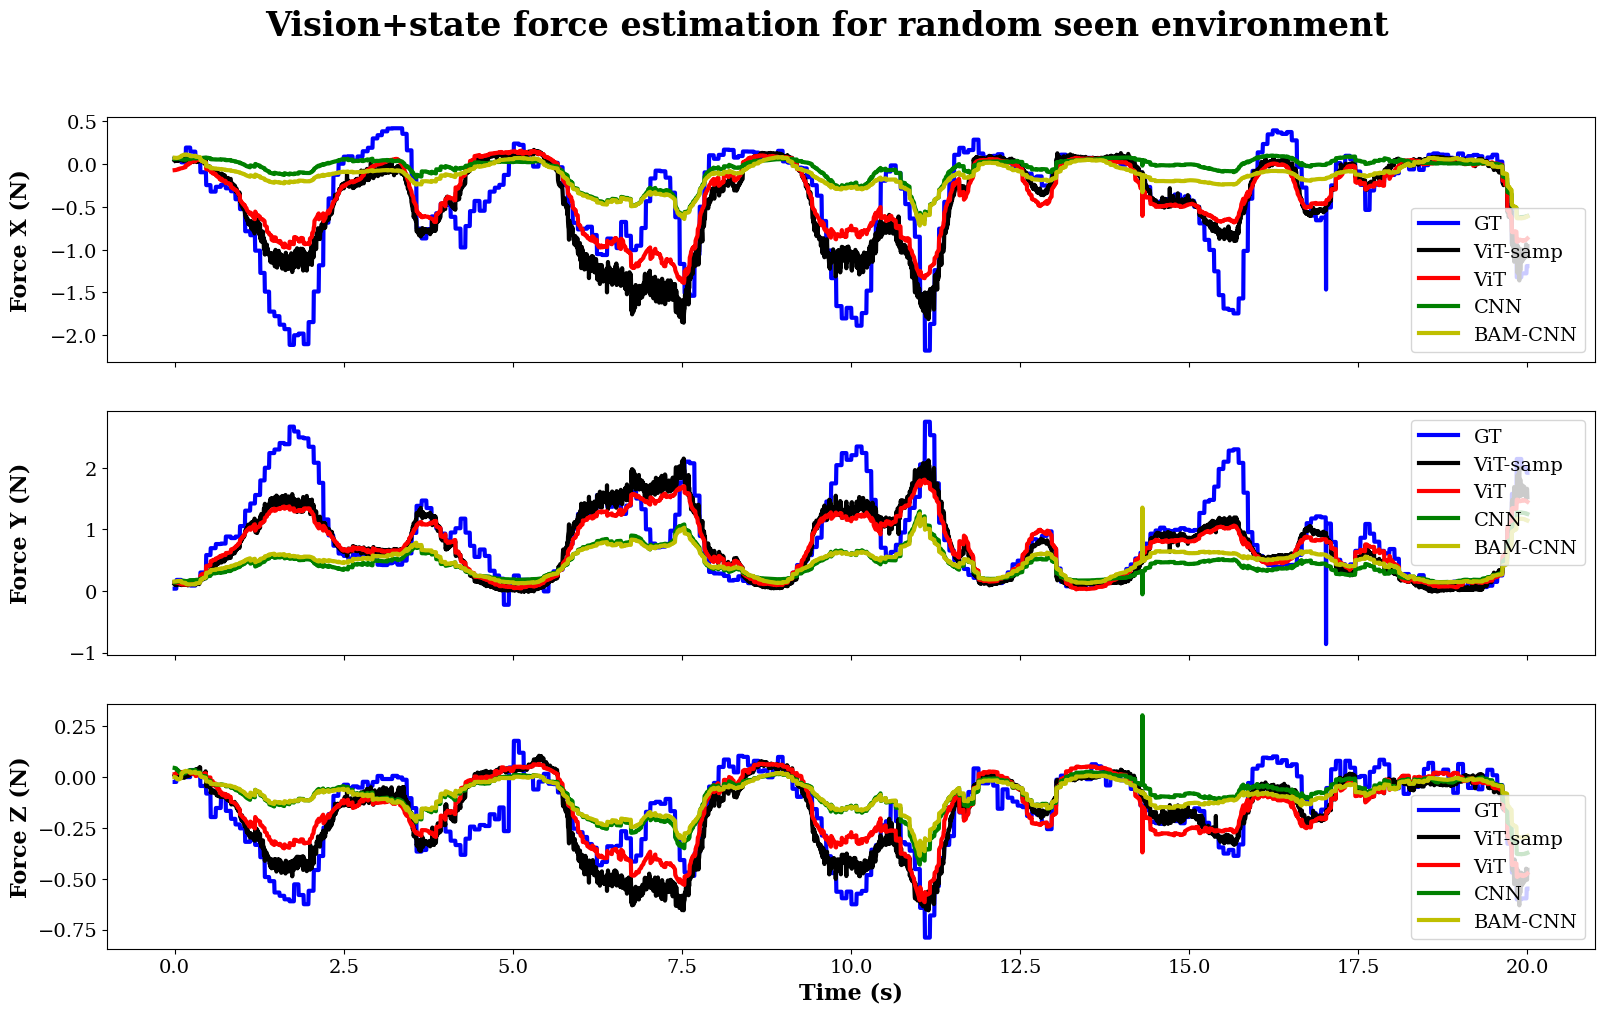

In [4]:
# Cell to plot the force estimation for the shared shareding set
x_visu = (1/30)*np.linspace(0, 600, 600)
x = (1/30)*np.linspace(0, 600, len(results['vit_state_random']['shared_gt']))
my_dpi = 100
labels = ['X', 'Y', 'Z']
for f in features:

    fig, axs = plt.subplots(ncols=1, nrows=3, sharex=True, sharey=False, figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
    fig.suptitle("Vision only force estimation for {} seen environment".format(f), fontsize=24, fontweight='bold')

    for j, ax in enumerate(axs):

        ax.plot(x, results['vit_state_{}'.format(f)]['shared_gt'][:, j], 'b', linewidth=3.0)
        ax.plot(x_visu, results['vit_visu_{}'.format(f)]['shared_pred'][:, j], 'k', linewidth=3.0)
        ax.plot(x_visu, results['vit-base_visu_{}'.format(f)]['shared_pred'][:, j], 'r', linewidth=3.0)
        ax.plot(x_visu, results['cnn_visu_{}'.format(f)]['shared_pred'][:, j], 'g', linewidth=3.0)
        ax.plot(x_visu, results['cnn-bam_visu_{}'.format(f)]['shared_pred'][:, j], 'y', linewidth=3.0)
        ax.legend(["GT", 'ViT-samp', 'ViT', 'CNN', 'BAM-CNN'], fontsize=14)
        ax.set_ylabel("Force {} (N)".format(labels[j]), fontsize=16, fontweight='bold')
        if j == 2:
            ax.set_xlabel("Time (s)", fontsize=16, fontweight='bold')

    fig.align_labels()
    fig.savefig('figures/shared/{}_visu.png'.format(f), dpi=my_dpi)
    #plt.show()

    fig, axs = plt.subplots(ncols=1, nrows=3, sharex=True, sharey=False, figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
    fig.suptitle("Vision+state force estimation for {} seen environment".format(f), fontsize=24, fontweight='bold')

    for j, ax in enumerate(axs):

        ax.plot(x, results['vit_state_{}'.format(f)]['shared_gt'][:, j], 'b', linewidth=3.0)
        ax.plot(x, results['vit_state_{}'.format(f)]['shared_pred'][:, j], 'k', linewidth=3.0)
        ax.plot(x, results['vit-base_state_{}'.format(f)]['shared_pred'][:, j], 'r', linewidth=3.0)
        ax.plot(x, results['cnn_state_{}'.format(f)]['shared_pred'][:, j], 'g', linewidth=3.0)
        ax.plot(x, results['cnn-bam_state_{}'.format(f)]['shared_pred'][:, j], 'y', linewidth=3.0)
        ax.legend(["GT", 'ViT-samp', 'ViT', 'CNN', 'BAM-CNN'], fontsize=14)
        ax.set_ylabel("Force {} (N)".format(labels[j]), fontsize=16, fontweight='bold')
        if j == 2:
            ax.set_xlabel("Time (s)", fontsize=16, fontweight='bold')

    fig.align_labels()
    # fig.savefig('figures/shared/{}_state.png'.format(f), dpi=my_dpi)
    plt.show()

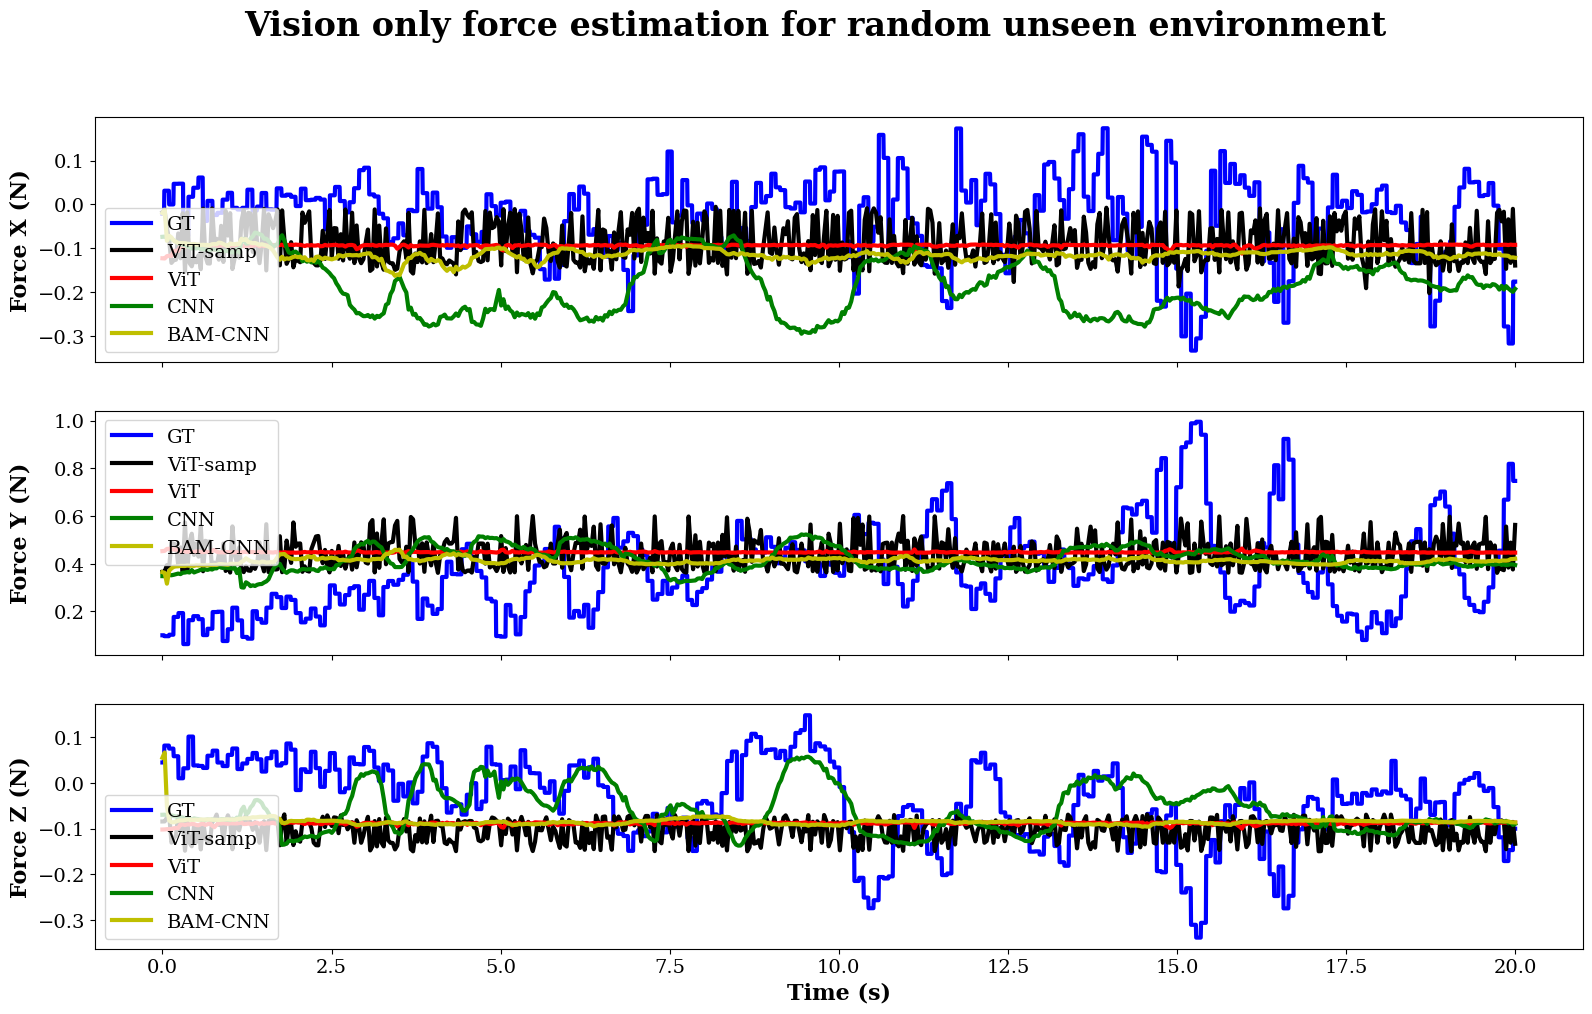

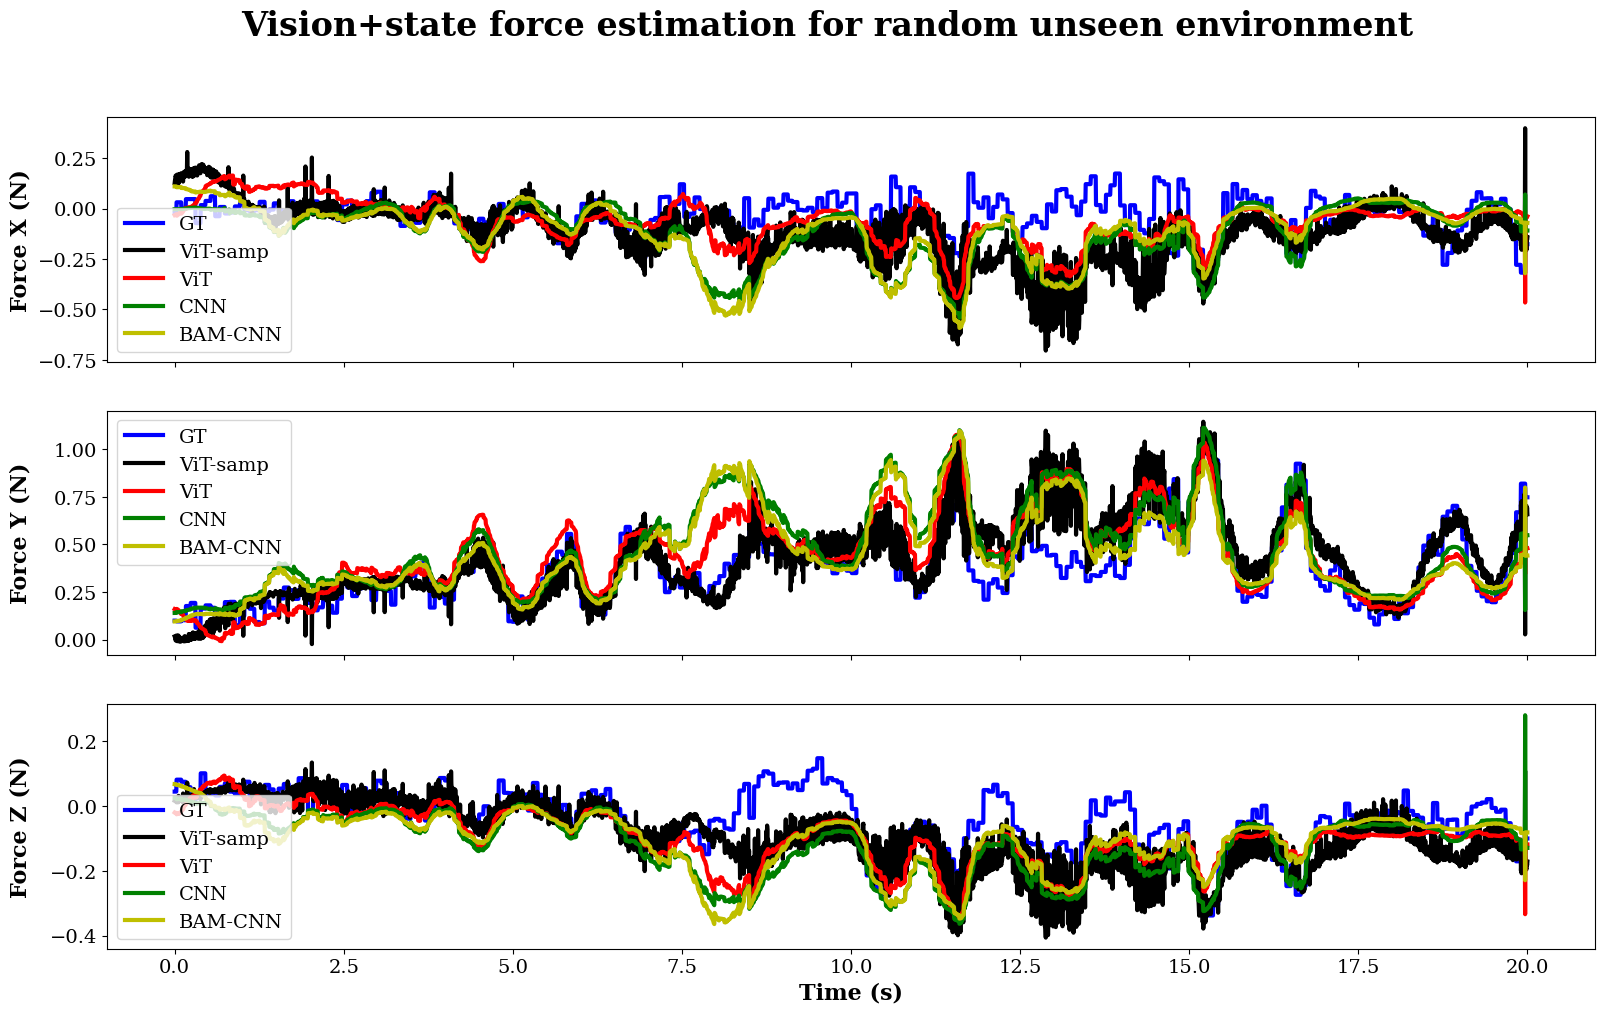

In [5]:
# Cell to plot the force estimation for the unseen testing set
x_visu = (1/30)*np.linspace(0, 600, 600)
x = (1/30)*np.linspace(0, 600, len(results['vit_state_random']['test_gt']))
my_dpi = 100
labels = ['X', 'Y', 'Z']

for f in features:

    fig, axs = plt.subplots(ncols=1, nrows=3, sharex=True, sharey=False, figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
    fig.suptitle("Vision only force estimation for {} unseen environment".format(f), fontsize=24, fontweight='bold')

    for j, ax in enumerate(axs):

        ax.plot(x, results['vit_state_{}'.format(f)]['test_gt'][:, j], 'b', linewidth=3.0)
        ax.plot(x_visu, results['vit_visu_{}'.format(f)]['test_pred'][:, j], 'k', linewidth=3.0)
        ax.plot(x_visu, results['vit-base_visu_{}'.format(f)]['test_pred'][:, j], 'r', linewidth=3.0)
        ax.plot(x_visu, results['cnn_visu_{}'.format(f)]['test_pred'][:, j], 'g', linewidth=3.0)
        ax.plot(x_visu, results['cnn-bam_visu_{}'.format(f)]['test_pred'][:, j], 'y', linewidth=3.0)
        ax.legend(["GT", 'ViT-samp', 'ViT', 'CNN', 'BAM-CNN'], fontsize=14)
        ax.set_ylabel("Force {} (N)".format(labels[j]), fontsize=16, fontweight='bold')
        if j == 2:
            ax.set_xlabel("Time (s)", fontsize=16, fontweight='bold')

    fig.align_labels()
    fig.savefig('figures/test/{}_visu.png'.format(f), dpi=my_dpi)
    # plt.show()

    fig, axs = plt.subplots(ncols=1, nrows=3, sharex=True, sharey=False, figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
    fig.suptitle("Vision+state force estimation for {} unseen environment".format(f), fontsize=24, fontweight='bold')

    for j, ax in enumerate(axs):

        ax.plot(x, results['vit_state_{}'.format(f)]['test_gt'][:, j], 'b', linewidth=3.0)
        ax.plot(x, results['vit_state_{}'.format(f)]['test_pred'][:, j], 'k', linewidth=3.0)
        ax.plot(x, results['vit-base_state_{}'.format(f)]['test_pred'][:, j], 'r', linewidth=3.0)
        ax.plot(x, results['cnn_state_{}'.format(f)]['test_pred'][:, j], 'g', linewidth=3.0)
        ax.plot(x, results['cnn-bam_state_{}'.format(f)]['test_pred'][:, j], 'y', linewidth=3.0)
        ax.legend(["GT", 'ViT-samp', 'ViT', 'CNN', 'BAM-CNN'], fontsize=14)
        ax.set_ylabel("Force {} (N)".format(labels[j]), fontsize=16, fontweight='bold')
        if j == 2:
            ax.set_xlabel("Time (s)", fontsize=16, fontweight='bold')

    fig.align_labels()
    # fig.savefig('figures/test/{}_state.png'.format(f), dpi=my_dpi)
    plt.show()